In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

In [2]:
Normal_DIR = ".\Bearing Vibration signals for Classification\Train/N97.mat"
B007_DIR = ".\Bearing Vibration signals for Classification\Train/B118.mat"
IR007_DIR = ".\Bearing Vibration signals for Classification\Train/I105.mat"
OR007_DIR = ".\Bearing Vibration signals for Classification\Train/O130.mat"
Normal=scipy.io.loadmat(Normal_DIR)['X097_DE_time'].transpose()[0] 
Inner=scipy.io.loadmat(IR007_DIR)['X105_DE_time'].transpose()[0] 
Outer=scipy.io.loadmat(OR007_DIR)['X130_DE_time'].transpose()[0]
Ball=scipy.io.loadmat(B007_DIR)['X118_DE_time'].transpose()[0]

In [3]:
lengthNormal = len(Normal);
lengthInner = len(Inner);
lengthOuter = len(Outer);
lengthBall = len(Ball);
print(lengthNormal, lengthInner, lengthOuter, lengthBall)
# 243938 121265 121991 122571


243938 121265 121991 122571


In [4]:
#规范数据长度，并且是每size长度为一条数据
size = 500;
lengthNormal = lengthNormal - lengthNormal%size;
lengthInner = lengthInner - lengthInner%size;
lengthOuter = lengthOuter - lengthOuter%size;
lengthBall = lengthBall - lengthBall%size;
Normal = Normal[0:lengthNormal]
Inner = Inner[0:lengthInner]
Outer = Outer[0:lengthOuter]
Ball = Ball[0:lengthBall]
print(Normal.shape)
#连接数据集
data = []
data.extend(Normal);
data.extend(Inner);
data.extend(Outer);
data.extend(Ball);
lengthData = lengthNormal + lengthInner + lengthOuter + lengthBall;
data = np.array(data);
print(data.shape)
print('数据个数：',lengthData/size)

#将一维数组变成二维（lengthData/size * size）
data = data.reshape(int(lengthData/size),size);
print(data.shape)

#在机器学习中，为了解决分类器不易处理离散数据的问题, 将标签改为one-hot编码形式
label = []
label.extend([[1,0,0,0] for i in range(0,int(lengthNormal/size))]);
label.extend([[0,1,0,0] for i in range(0,int(lengthInner/size))]);
label.extend([[0,0,1,0] for i in range(0,int(lengthOuter/size))]);
label.extend([[0,0,0,1] for i in range(0,int(lengthBall/size))]);
label = np.array(label)
print('label:',label)
print(label.shape)


(243500,)
(608500,)
数据个数： 1217.0
(1217, 500)
label: [[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]
(1217, 4)


In [5]:
#打乱顺序
index = [i for i in range(0,int(lengthData/size))];
np.random.shuffle(index);
randData = [];
randLabel = [];
for i in range(0,int(lengthData/size)):
    randData.append(data[index[i]]);
    randLabel.append(label[index[i]]);
randData = np.array(randData);
randLabel = np.array(randLabel);

#归一化，为了运算方便，减少不必要的消耗
dataMean = np.mean(randData)
dataStd = np.std(randData)
randData -= dataMean
randData /= dataStd


trainData=randData;
trainLabel=randLabel;

In [6]:
#制作测试数据集
Normal_test = ".\Bearing Vibration signals for Classification\Test/N100.mat"
B021_test = ".\Bearing Vibration signals for Classification\Test/B225.mat"
IR021_test = ".\Bearing Vibration signals for Classification\Test/I212.mat"
OR021_test = ".\Bearing Vibration signals for Classification\Test/O237.mat"
Normaltest=scipy.io.loadmat(Normal_test)['X100_DE_time'].transpose()[0] 
Innertest=scipy.io.loadmat(IR021_test)['X212_DE_time'].transpose()[0] 
Outertest=scipy.io.loadmat(OR021_test)['X237_DE_time'].transpose()[0]
Balltest=scipy.io.loadmat(B021_test)['X225_DE_time'].transpose()[0]

#规范数据长度，并且是每size长度为一条数据
lengthNormal = len(Normaltest);
lengthInner = len(Innertest);
lengthOuter = len(Outertest);
lengthBall = len(Balltest);
size = 500;
lengthNormal = lengthNormal - lengthNormal%size;
lengthInner = lengthInner - lengthInner%size;
lengthOuter = lengthOuter - lengthOuter%size;
lengthBall = lengthBall - lengthBall%size;
Normaltest = Normaltest[0:lengthNormal]
Innertest = Innertest[0:lengthInner]
Outertest = Outertest[0:lengthOuter]
Balltest = Balltest[0:lengthBall]
print(Normaltest.shape)
#连接数据集
testdata = []
testdata.extend(Normaltest);
testdata.extend(Innertest);
testdata.extend(Outertest);
testdata.extend(Balltest);
lengthtestData = lengthNormal + lengthInner + lengthOuter + lengthBall;
testdata = np.array(testdata);
print(testdata.shape)
print('数据个数：',lengthtestData/size)

#将一维数组变成二维（lengthtestData/size * size）
testdata = testdata.reshape(int(lengthtestData/size),size);
print(testdata.shape)
#归一化，为了运算方便，减少不必要的消耗
dataMean = np.mean(randData)
dataStd = np.std(randData)
randData -= dataMean
randData /= dataStd


trainData=randData;
trainLabel=randLabel;
#在机器学习中，为了解决分类器不易处理离散数据的问题, 将标签改为one-hot编码形式
testlabel = []
testlabel.extend([[1,0,0,0] for i in range(0,int(lengthNormal/size))]);
testlabel.extend([[0,1,0,0] for i in range(0,int(lengthInner/size))]);
testlabel.extend([[0,0,1,0] for i in range(0,int(lengthOuter/size))]);
testlabel.extend([[0,0,0,1] for i in range(0,int(lengthBall/size))]);
testLabel = np.array(testlabel)
print('testlabel:',testLabel)
print(testLabel.shape)


(485500,)
(850500,)
数据个数： 1701.0
(1701, 500)
testlabel: [[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]
(1701, 4)


In [7]:
#为了方便输入一维神经网络，将训练和测试数据改为(样本数，样本长度，1)的格式
trainData = trainData[:,:,np.newaxis]
testData = testdata[:,:,np.newaxis]
print(trainData.shape)
print(testData.shape)
input_shape = trainData.shape[1:]

(1217, 500, 1)
(1701, 500, 1)


In [8]:
from tensorflow.keras.layers import Conv1D, Dense, Dropout, BatchNormalization, MaxPooling1D, Activation, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

In [9]:
num_classes = 4
BatchNorm = True

# 实例化序贯模型
model = Sequential()

# 搭建输入层，第一层卷积。因为要指定input_shape，所以单独放出来
model.add(Conv1D(filters=8, kernel_size=16, strides=16, padding='same',kernel_regularizer=l2(1e-4), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=4))

# 第二层卷积
model.add(Conv1D(filters=4, kernel_size=8, strides=2, padding='same',activation=tf.nn.relu))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate=0.3))

# 从卷积到全连接需要展平
model.add(Flatten())

# 添加全连接层
model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(1e-4)))

# 增加输出层
model.add(Dense(units=num_classes, activation='softmax', kernel_regularizer=l2(1e-4)))
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 32, 8)             136       
_________________________________________________________________
activation (Activation)      (None, 32, 8)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 8)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 4)              260       
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4)              0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 4)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 4)              0

In [10]:
#定义优化器为Adam，损失函数为交叉熵损失
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
#模型训练，返回history对象，history为字典类型，包含val_loss,val_acc,loss,acc四个key值
history=model.fit(trainData, trainLabel, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
16/16 [==============================] - 2s 69ms/step - loss: 1.3565 - accuracy: 0.3698 - val_loss: 1.2876 - val_accuracy: 0.4877
Epoch 2/20
16/16 [==============================] - 0s 5ms/step - loss: 1.2702 - accuracy: 0.5280 - val_loss: 1.2155 - val_accuracy: 0.5738
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: 1.1889 - accuracy: 0.5974 - val_loss: 1.1522 - val_accuracy: 0.5738
Epoch 4/20
16/16 [==============================] - 0s 6ms/step - loss: 1.1375 - accuracy: 0.6005 - val_loss: 1.0696 - val_accuracy: 0.5738
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 1.0125 - accuracy: 0.6088 - val_loss: 0.9426 - val_accuracy: 0.5861
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: 0.8655 - accuracy: 0.6539 - val_loss: 0.7817 - val_accuracy: 0.6270
Epoch 7/20
16/16 [==============================] - 0s 6ms/step - loss: 0.7502 - accuracy: 0.6439 - val_loss: 0.6458 - val_accuracy: 0.6803
Epoch 8/20
16/16 [=

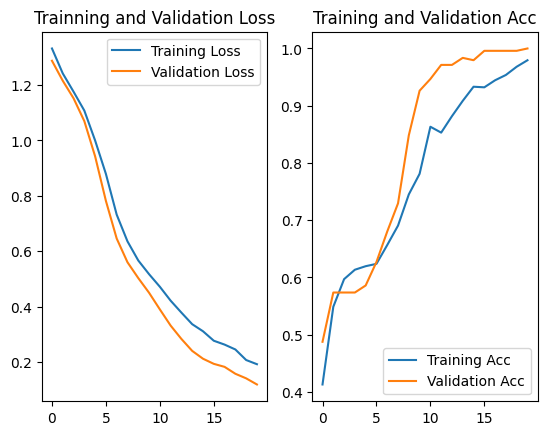

In [12]:
# 训练结果可视化
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.subplot(1,2,1)
plt.plot(loss,label = "Training Loss")
plt.plot(val_loss,label = "Validation Loss")
plt.title("Trainning and Validation Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(acc,label = "Training Acc")
plt.plot(val_acc,label = "Validation Acc")
plt.title("Training and Validation Acc")
plt.legend()

In [13]:
#模型评估
loss,accuracy = model.evaluate(testData,testLabel)
print('loss:',loss,'accuracy:',accuracy)

54/54 [==============================] - 0s 1ms/step - loss: 0.9703 - accuracy: 0.6302
loss: 0.970285177230835 accuracy: 0.6302174925804138
